In [1]:
pip install datetime

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install snscrape

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install spacy

Note: you may need to restart the kernel to use updated packages.


In [4]:
from datetime import date
import snscrape.modules.twitter as sntwitter
import pandas as pd
import numpy as np
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')
import nltk
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
import spacy
import en_core_web_sm
nlp = spacy.load("en_core_web_sm")

In [5]:
#Create a list to append tweet data
tweets_list = []
maxTweets = 1000

#Using TwitterSearchScraper to scrape data and append tweets to list
for i, tweet in enumerate(sntwitter.TwitterSearchScraper('climate change since:2020-10-01 until:2022-10-01').get_items()):
    if i > maxTweets:
        break
    tweets_list.append([tweet.content])

#Creating a dataframe from the tweets the list above
tweets_to_df = pd.DataFrame(tweets_list, columns=['Tweets'])    

In [6]:
tweets_to_df.head() #lists first five tweets

,Tweets
0,@RonniSalt @ClimateHuman QandA is all about ba...
1,@bennyjohnson SERIOUSLY? IT'S A FUCKING HURRI...
2,Beach erosion isn’t climate change \n\nIt’s ca...
3,"https://t.co/bqPHhgL11U\n\nI AGREE, CLIMATE CH..."
4,@NickAdamsinUSA Imagine seeing the devastating...


In [7]:
#clean the tweets with a re (regular experssion) function

def cleanTweets(text):
    text = re.sub('@[A-Za-z0-9_]+', '', text) #removes @mentions
    text = re.sub('#', '', text) #removes hastag symbol
    text = re.sub('RT[\s]+', '', text)
    text = re.sub('https?:\/\/\S+', '', text)
    text = re.sub('\n', ' ', text)
    return text

tweets_to_df['cleanedTweets'] = tweets_to_df['Tweets'].apply(cleanTweets) #apply cleantweet function to the tweet

tweets_to_df.head()

,Tweets,cleanedTweets
0,@RonniSalt @ClimateHuman QandA is all about ba...,QandA is all about balance. Someone who is ...
1,@bennyjohnson SERIOUSLY? IT'S A FUCKING HURRI...,SERIOUSLY? IT'S A FUCKING HURRICANE.... 1938...
2,Beach erosion isn’t climate change \n\nIt’s ca...,Beach erosion isn’t climate change It’s call...
3,"https://t.co/bqPHhgL11U\n\nI AGREE, CLIMATE CH...","I AGREE, CLIMATE CHANGE IS MAN-MADE AND IT I..."
4,@NickAdamsinUSA Imagine seeing the devastating...,Imagine seeing the devastating effects of Ian...


In [8]:
tweets_to_df.to_csv('tweets_climate change.csv') #write dataframe into csv file

savedTweets = pd.read_csv('tweets_climate change.csv', index_col=0) #reads csv file

In [9]:
savedTweets.shape

(1001, 2)

In [10]:
savedTweets

,Tweets,cleanedTweets
0,@RonniSalt @ClimateHuman QandA is all about ba...,QandA is all about balance. Someone who is ...
1,@bennyjohnson SERIOUSLY? IT'S A FUCKING HURRI...,SERIOUSLY? IT'S A FUCKING HURRICANE.... 1938...
2,Beach erosion isn’t climate change \n\nIt’s ca...,Beach erosion isn’t climate change It’s call...
3,"https://t.co/bqPHhgL11U\n\nI AGREE, CLIMATE CH...","I AGREE, CLIMATE CHANGE IS MAN-MADE AND IT I..."
4,@NickAdamsinUSA Imagine seeing the devastating...,Imagine seeing the devastating effects of Ian...
...,...,...
996,Bill Nye should not have to debunk climate cha...,Bill Nye should not have to debunk climate cha...
997,@janedoe966 Climate change is real and natural...,Climate change is real and natural AGW is the...
998,@staceyabrams You can put that climate change ...,You can put that climate change where the sun...
999,@that_denver @dadrado2 I don't even think abou...,I don't even think about climate change


In [11]:
#get subjectivity and polarity of tweets with a function
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#get polarity with a function
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

savedTweets['Subjectivity'] = savedTweets['cleanedTweets'].apply(getSubjectivity)
savedTweets['Polarity'] = savedTweets['cleanedTweets'].apply(getPolarity)

In [12]:
savedTweets.drop('Tweets', axis=1).head(10) #shows polarity and subjectivity of each tweet and drops tweets column

,cleanedTweets,Subjectivity,Polarity
0,QandA is all about balance. Someone who is ...,0.275000,0.066667
1,SERIOUSLY? IT'S A FUCKING HURRICANE.... 1938...,0.900000,-0.600000
2,Beach erosion isn’t climate change It’s call...,0.000000,0.000000
3,"I AGREE, CLIMATE CHANGE IS MAN-MADE AND IT I...",0.100000,0.000000
4,Imagine seeing the devastating effects of Ian...,1.000000,-1.000000
5,I think this 10% estimate is in the ball park....,0.750000,0.350000
6,The Arctic is 5.5 million square miles and acc...,0.320513,-0.076923
7,"You cannot just “build back”, , you need to ...",0.000000,0.000000
8,You’re the one denying science by falsely att...,0.600000,-0.400000
9,Cars in flooded water after HurricaneHarvey hi...,0.000000,0.000000


In [13]:
#Create a function to check negative, neutral, and positive analysis
def getAnalysis(score):
    if score<0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

savedTweets['Analysis'] = savedTweets['Polarity'].apply(getAnalysis)

In [14]:
savedTweets.drop('Tweets', axis = 1).head(10)

,cleanedTweets,Subjectivity,Polarity,Analysis
0,QandA is all about balance. Someone who is ...,0.275000,0.066667,Positive
1,SERIOUSLY? IT'S A FUCKING HURRICANE.... 1938...,0.900000,-0.600000,Negative
2,Beach erosion isn’t climate change It’s call...,0.000000,0.000000,Neutral
3,"I AGREE, CLIMATE CHANGE IS MAN-MADE AND IT I...",0.100000,0.000000,Neutral
4,Imagine seeing the devastating effects of Ian...,1.000000,-1.000000,Negative
5,I think this 10% estimate is in the ball park....,0.750000,0.350000,Positive
6,The Arctic is 5.5 million square miles and acc...,0.320513,-0.076923,Negative
7,"You cannot just “build back”, , you need to ...",0.000000,0.000000,Neutral
8,You’re the one denying science by falsely att...,0.600000,-0.400000,Negative
9,Cars in flooded water after HurricaneHarvey hi...,0.000000,0.000000,Neutral


In [15]:
savedTweets[savedTweets['Analysis']=='Positive']

,Tweets,cleanedTweets,Subjectivity,Polarity,Analysis
0,@RonniSalt @ClimateHuman QandA is all about ba...,QandA is all about balance. Someone who is ...,0.275000,0.066667,Positive
5,I think this 10% estimate is in the ball park....,I think this 10% estimate is in the ball park....,0.750000,0.350000,Positive
11,entropy is gonna get us all so one day the las...,entropy is gonna get us all so one day the las...,0.486111,0.141667,Positive
12,@jasonrantz They are too busy fighting the cli...,They are too busy fighting the climate change...,0.300000,0.125000,Positive
13,Should people who move to states with unsustai...,Should people who move to states with unsustai...,0.308333,0.025000,Positive
...,...,...,...,...,...
987,Climate change confusion: Extreme heat waves a...,Climate change confusion: Extreme heat waves a...,0.600000,0.158333,Positive
988,@BeschlossDC who installed solar panels (for h...,who installed solar panels (for hot water) on...,0.284722,0.023611,Positive
993,"In other news, the world’s most freshwater-ric...","In other news, the world’s most freshwater-ric...",0.291667,0.125000,Positive
995,@USATRUMPMAN1 crime will go up huge. i cant be...,crime will go up huge. i cant believe press c...,0.637500,0.137500,Positive


In [16]:
savedTweets['Analysis'].value_counts() #shows the counts of tweets' polarity

Positive    394
Neutral     330
Negative    277
Name: Analysis, dtype: int64

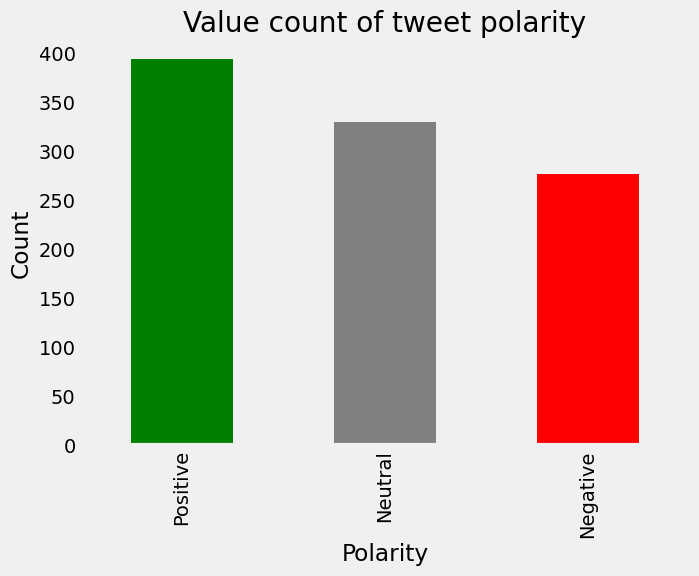

In [17]:
#plot a bar graph to show count of tweet sentiment
fig = plt.figure(figsize=(7,5))
#xlabel = ['Positive, 'Negative', 'Neutral']
#plt.bar(xlabel, savedTweets['Analysis'].value_counts(), color = color)
color = ['green', 'grey', 'red']
savedTweets['Analysis'].value_counts().plot(kind='bar', color = color)
plt.title('Value count of tweet polarity')
plt.ylabel('Count')
plt.xlabel('Polarity')
plt.grid(False)
plt.show()

Text(0.5, 1.0, 'Distribution of Polarity')

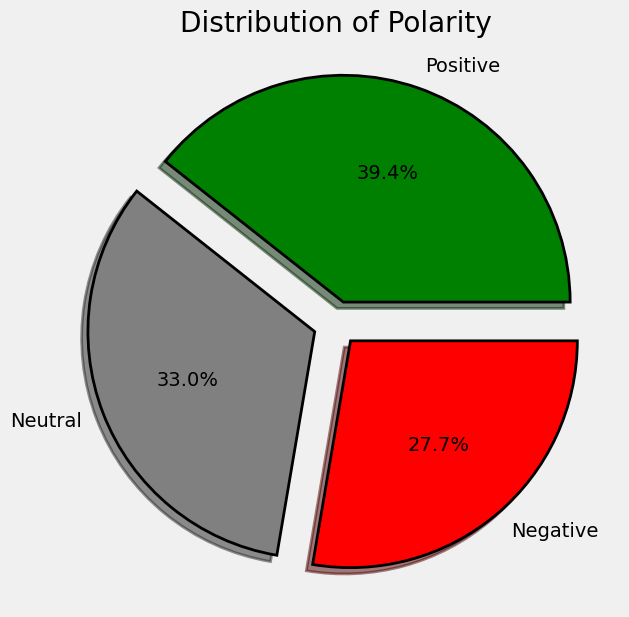

In [18]:
#pie chart to show percentage distribution of polarity
fig = plt.figure(figsize = (7,7))
colors = ('green', 'grey', 'red')
wp = {'linewidth':2, 'edgecolor': 'black'}
tags = savedTweets['Analysis'].value_counts()
explode = (0.1,0.1,0.1)
tags.plot(kind = 'pie', autopct = '%1.1f%%', shadow = True, colors = colors, wedgeprops = wp, explode = explode, label = '')
plt.title('Distribution of Polarity')

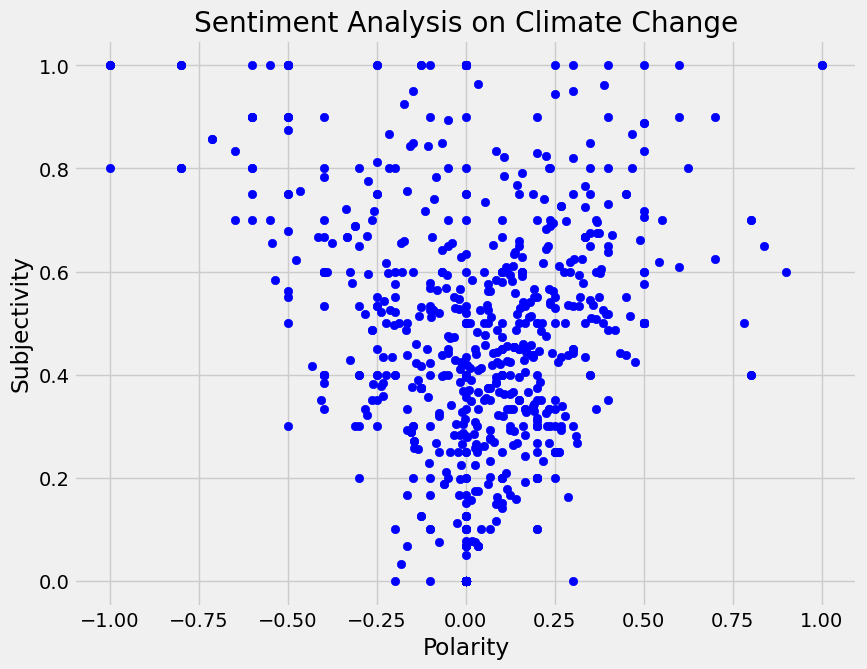

In [19]:
#plot the polarity and subjectivity on a scatter plot
plt.figure(figsize=(9,7))
for i in range(0,savedTweets.shape[0]):
    plt.scatter(savedTweets['Polarity'][i], savedTweets['Subjectivity'][i], color='blue')
plt.title('Sentiment Analysis on Climate Change')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [20]:
#create a function for wordcloud
def create_wordcloud(text):
    allWords = ' '.join([tweets for tweets in text])
    wordCloud = WordCloud(background_color='white', width=800, height=500, random_state=21, max_font_size=130).generate(allWords)
    plt.figure(figsize=(10,10))
    plt.imshow(wordCloud)
    plt.axis('off')
    plt.show()

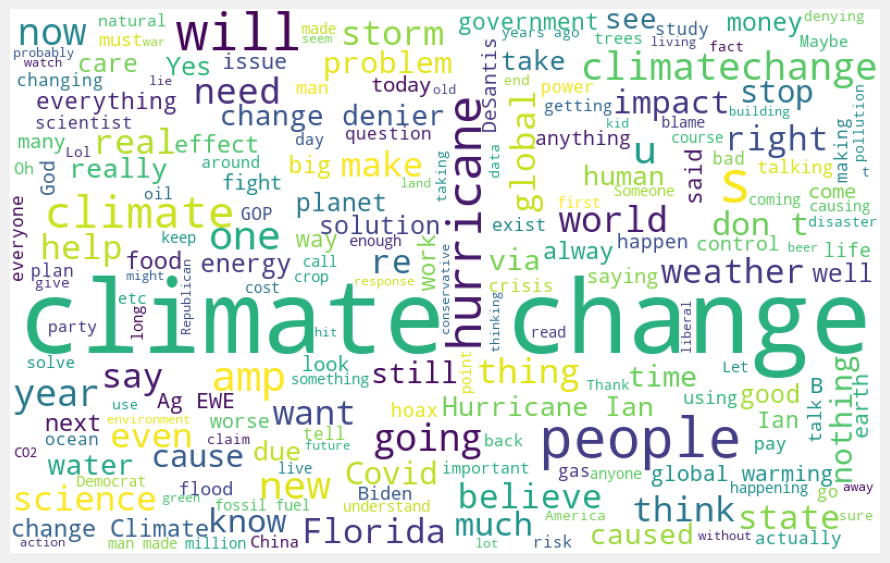

In [21]:
#plot wordcloud for all tweets
allTweets = savedTweets['cleanedTweets']
create_wordcloud(allTweets)

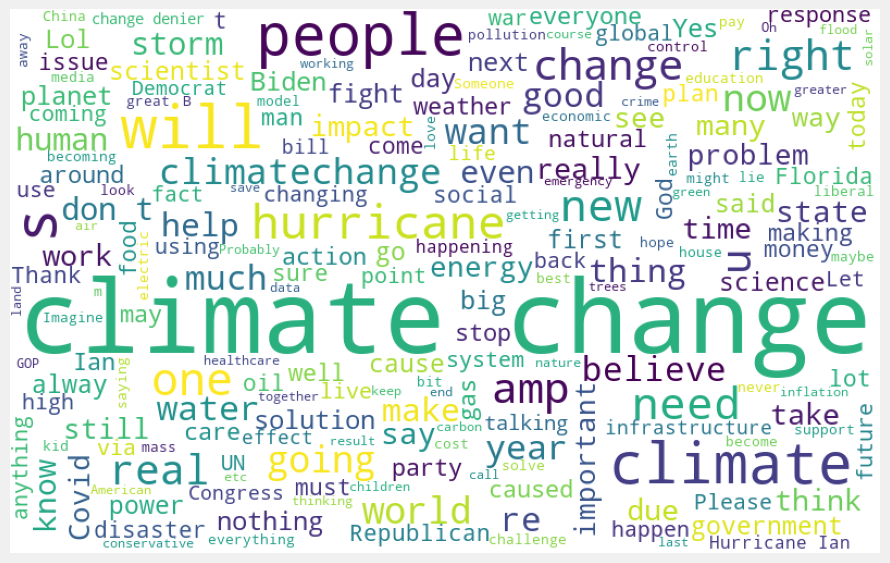

In [22]:
#create wordcloud for positive tweets
posTweets = savedTweets.loc[savedTweets['Analysis']=='Positive', 'cleanedTweets']
create_wordcloud(posTweets)

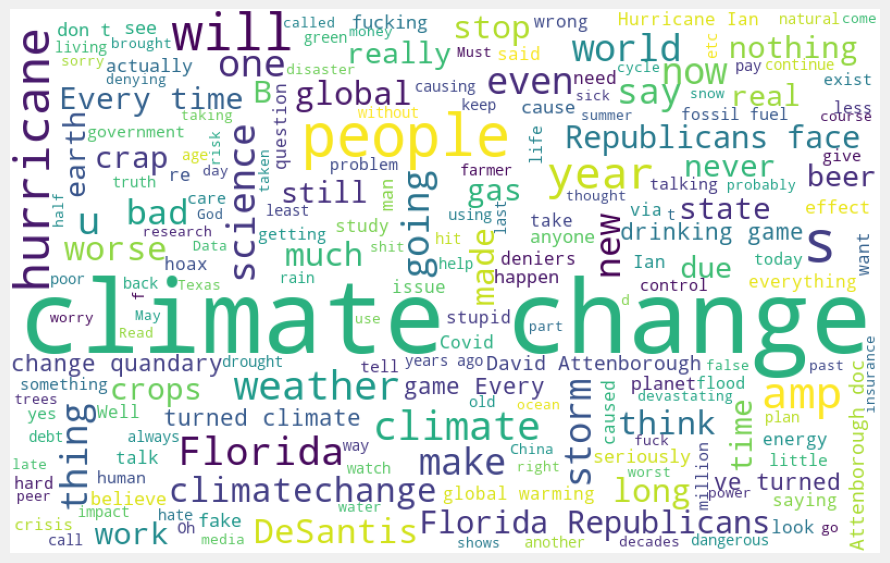

In [23]:
#create wordcloud for negative tweets
negTweets = savedTweets.loc[savedTweets['Analysis']=='Negative', 'cleanedTweets']
create_wordcloud(negTweets)

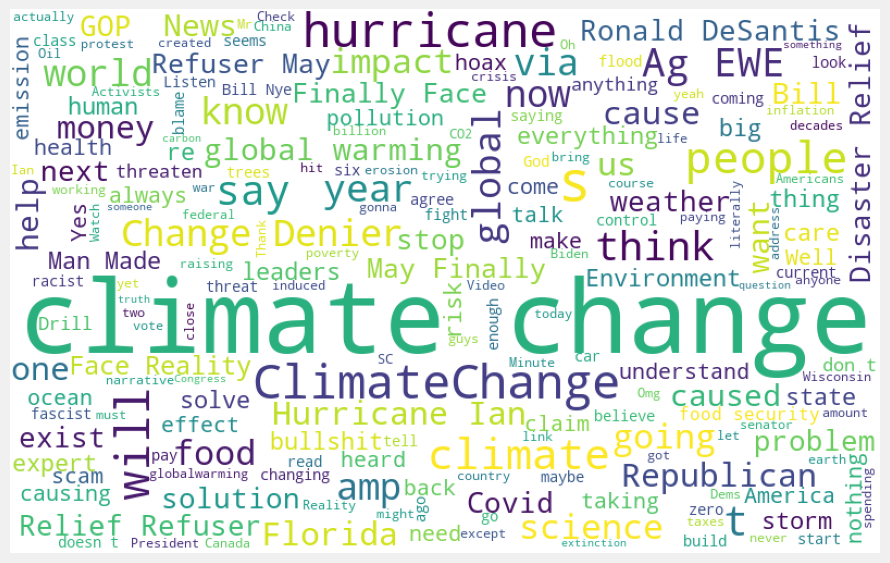

In [24]:
#create wordcloud for neutral tweets
neuTweets = savedTweets.loc[savedTweets['Analysis']=='Neutral', 'cleanedTweets']
create_wordcloud(neuTweets)

In [25]:
savedTweets.shape[0] #shows total rows of tweets

1001

In [26]:
# get the percentage of positive tweets
pTweets = savedTweets[savedTweets['Analysis']=='Positive']
pTweets = pTweets['cleanedTweets']
percentage = round((pTweets.shape[0]/savedTweets.shape[0]) *100, 1)
print('Percentage of positive tweets: {0}%'.format(percentage))

Percentage of positive tweets: 39.4%


In [27]:
# get the percentage of negative tweets
nTweets = savedTweets[savedTweets['Analysis']=='Negative']
nTweets = nTweets['cleanedTweets']
percentage = round((nTweets.shape[0]/savedTweets.shape[0]) *100, 1)
print('Percentage of negative tweets: {0}%'.format(percentage))

Percentage of negative tweets: 27.7%


In [28]:
#break each tweet sentence into words
sentences = []
for word in savedTweets['cleanedTweets']:
    sentences.append(word)
sentences

lines = list()
for line in sentences:
    words = line.split()
    for w in words:
        lines.append(w)
lines[:10]

['QandA',
 'is',
 'all',
 'about',
 'balance.',
 'Someone',
 'who',
 'is',
 'anti',
 'racist.']

In [29]:
#stemming all the words to their root word
stemmer = SnowballStemmer(language='english')
stem=[]
for word in lines:
    stem.append(stemmer.stem(word))
stem[:20]    

['qanda',
 'is',
 'all',
 'about',
 'balance.',
 'someon',
 'who',
 'is',
 'anti',
 'racist.',
 'someon',
 'who',
 'is',
 'apathet',
 'someon',
 'who',
 'is',
 'deepli',
 'racist',
 'someon']

In [30]:
#removes stopwords (very common words in a sentence)
stem2 = []
for word in stem:
    if word not in nlp.Defaults.stop_words:
        stem2.append(word)
#stem2[:20]

In [31]:
#creates a new dataframe for the stem
df = pd.DataFrame(stem2)
df = df[0].value_counts()
df

climat             1005
chang               693
change.             139
peopl               102
hurrican             88
                   ... 
f*cking               1
verni                 1
furthest              1
change--doesn't       1
induceddemand         1
Name: 0, Length: 5166, dtype: int64

/Users/elmojuanara/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


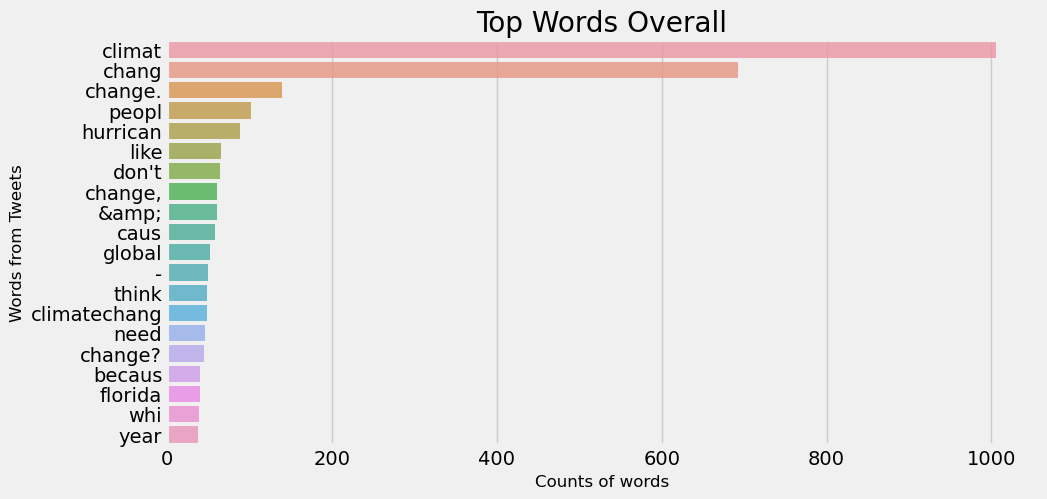

In [32]:
#plot the top 20 used words
df = df[:20]
plt.figure(figsize=(10,5))
sns.barplot(df.values, df.index, alpha=0.8)
plt.title('Top Words Overall')
plt.xlabel('Counts of words', fontsize=12)
plt.ylabel('Words from Tweets', fontsize=12)
plt.show()